In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import os
import numpy as np
import pathlib
from pathlib import Path
from PIL import Image
from torchvision import transforms
import pandas as pd


In [2]:
# Set the path to the dataset
dataset_path = "C:\\Users\\Kamal\\DownloadsRice_Image_Dataset\\Rice_Image_Dataset"

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
    
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
  
  # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
    
        # Store the label for the image in the labels list
        labels.append(subfolder)
 
 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75001 entries, 0 to 75000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   75001 non-null  object
 1   label   75001 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [4]:
# Determine the number of samples per class 
samples_per_class = df['label'].value_counts().min() //  15  # Since all classes are equally distributed
print(samples_per_class)

# Sample half of the rows per class
df_reduced = df.groupby('label', group_keys=False).apply(lambda x: x.sample(n=samples_per_class, random_state=42))

# Reset index
df_reduced = df_reduced.reset_index(drop=True)



print(df_reduced['label'].value_counts())  # To verify equal distribution

1000
label
Arborio      1000
Basmati      1000
Ipsala       1000
Jasmine      1000
Karacadag    1000
Name: count, dtype: int64


C:\Users\Kamal\AppData\Local\Temp\ipykernel_2640\180658875.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_reduced = df.groupby('label', group_keys=False).apply(lambda x: x.sample(n=samples_per_class, random_state=42))


In [5]:
df_reduced

,image,label
0,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,Arborio
1,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,Arborio
2,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,Arborio
3,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,Arborio
4,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,Arborio
...,...,...
4995,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,Karacadag
4996,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,Karacadag
4997,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,Karacadag
4998,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,Karacadag


In [6]:
df_reduced['label'] = df_reduced['label'].map({'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4})

In [7]:
df_reduced

,image,label
0,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,0
1,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,0
2,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,0
3,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,0
4,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,0
...,...,...
4995,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,4
4996,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,4
4997,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,4
4998,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,4


In [8]:
shuffled_df = df_reduced.sample(frac=1).reset_index(drop=True)
shuffled_df

,image,label
0,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,3
1,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,2
2,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,4
3,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,3
4,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,2
...,...,...
4995,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,1
4996,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,4
4997,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,4
4998,C:\Users\Kamal\DownloadsRice_Image_Dataset\Ric...,0


In [9]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale (1, H, W)
    transforms.ToTensor()  # Converts to tensor & scales pixels to [0,1]
])


In [10]:
from torch.utils.data import Dataset, DataLoader, random_split

class_names = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]
class_to_idx = {name: idx for idx, name in enumerate(class_names)}

class RiceDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        image =  self.dataframe.iloc[idx]["image"]
        label =  self.dataframe.iloc[idx]["label"]

        try:
            image = Image.open(image)# convert("RGB")  # Open image
        except Exception as e:
            print(f"Skipping corrupt image: {image_path} - {e}")
            return self.__getitem__((idx + 1) % len(self.image_paths))  # Skip to next image
        
        if self.transform:
            processed_image = self.transform(image)

        return {"image": processed_image, "label": label}


# Create dataset
dataset = RiceDataset(shuffled_df, transform=transform) 

# Define split sizes
train_size = int(0.9 * len(dataset))  # 80% for training
test_size = len(dataset) - train_size  # Remaining for testing

# Split dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Check sizes
print(f"Train size: {len(train_dataset)}, Test size: {len(test_dataset)}")


Train size: 4500, Test size: 500


In [11]:
full = DataLoader(dataset, batch_size=16, shuffle=False)

In [12]:
print(shuffled_df['label'].value_counts())

label
3    1000
2    1000
4    1000
1    1000
0    1000
Name: count, dtype: int64


In [13]:
print(test_dataset)

In [14]:
import matplotlib.pyplot as plt

In [15]:
len(full)

313

Labels: tensor([3, 2, 4, 3, 2, 1, 0, 3, 2, 2, 4, 2, 3, 1, 0, 0])
Batch shape: torch.Size([16, 1, 250, 250])


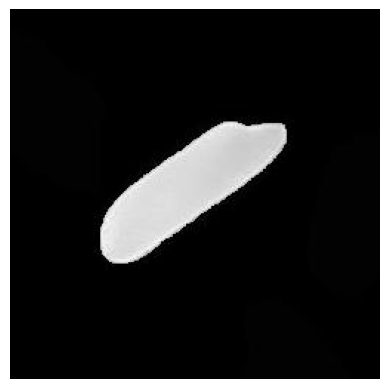

In [18]:
for batch in full:
    tensor = batch['image'][3]  # (batch_size, C, H, W)
    print(f"Labels: {batch['label']}")
    print(f"Batch shape: {batch['image'].shape}")
 # Stop after first batch
    image = tensor.squeeze(0).numpy()

    # Display the image
    plt.imshow(image, cmap="gray")
    plt.axis("off")  # Hide axes
    plt.show()
    break

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

class CustomCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(CustomCNN, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 48, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(negative_slope=0.01),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(48, 96, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(negative_slope=0.01),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(96, 192, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(negative_slope=0.01),
            nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(negative_slope=0.01),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(192, 256, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(negative_slope=0.01),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.fc_layers = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(256, 512),
            nn.LeakyReLU(negative_slope=0.01),
            nn.Dropout(0.3),  # Increased dropout to 0.3
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x
    # Model Initialization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomCNN(num_classes=5).to(device)

In [21]:
from num2words import num2words

def number_to_words(num):
    # Convert number to words in Indian numbering system
    return num2words(num, lang='en_IN')

def count_parameters(model):
    return sum(p.numel() for p in model.parameters()) 
# Assuming 'model' is your PyTorch model

total_params = count_parameters(model)
print(f"Total model parameters: {total_params} -- {number_to_words(total_params)}") 

Total model parameters: 1116869 -- eleven lakh, sixteen thousand, eight hundred and sixty-nine


In [22]:

import torch
import torch.nn as nn
from torch.optim.lr_scheduler import LambdaLR
from tqdm import tqdm
import os
from pathlib import Path
import warnings
from torch.utils.data import random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
train_images = []
val_images = []

epochs = 15
lr = 0.001

def train_model(model, full, num_epochs=100, lr=0.001):

    device = "cuda" if torch.cuda.is_available() else "mps" if torch.has_mps or torch.backends.mps.is_available() else "cpu"
    print("Using device:", device)
    if device == 'cuda':
        print(f"Device name: {torch.cuda.get_device_name(device.index)}")
        print(f"Device memory: {torch.cuda.get_device_properties(device.index).total_memory / 1024 ** 3} GB")

    checkpoint_path = "img_class_params.pth"
    if os.path.exists(checkpoint_path):
        model.load_state_dict(torch.load(checkpoint_path))
        print("Model loaded from checkpoint.")
    else :
        print("Checkpoint not found. Training from scratch.")

    model.to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr = lr,  weight_decay=1e-4)
    loss_fn = nn.CrossEntropyLoss().to(device)
    #scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

    for epoch in range(epochs):
        model.train()
        torch.cuda.empty_cache()
        
        total_losst, correctt, totalt = 0.0, 0, 0
        batch_iterator = tqdm(full, desc=f"Processing Epoch {epoch+1:02d}")
        for batch in batch_iterator:
            imagest = batch['image'].to(device)
            #train_images.append(images[0])
            labelt = batch['label'].to(device)
            #print("images ",images[0])
            #print("actual ",label)
            optimizer.zero_grad()
            
            outputt = model(imagest)
            #print("output ",outputt)

            loss = loss_fn(outputt, labelt)
            batch_iterator.set_postfix({"loss": f"{loss.item():6.3f}"})

            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)
            optimizer.step()
            
            total_losst += loss.item()
            s1, preds = torch.max(outputt, 1)  # Get predicted class
           # print("max logit ",s1)
            #print("pred ",preds)
            correctt += (preds == labelt).sum().item()
            totalt += labelt.size(0)
            
        train_acc = 100 * correctt / totalt
        avg_train_loss = total_losst / len(full)
        
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for batch in full:
                images = batch['image'].to(device)
                val_images.append(images[0])
                labels = batch['label'].to(device)
                #print("actual ",labels)
                outputs = model(images)
                #print("output ",outputs)
                lossv = loss_fn(outputs, labels)
                val_loss += lossv.item()
                s, predicted = torch.max(outputs, 1)
                #print("max logit ",s)
                #print("pred ",predicted)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss /= len(full)
        val_acc = 100 * val_correct / val_total
        #scheduler.step(val_loss)    
        
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}% \
               Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
        torch.save(model.state_dict(), "img_class_params.pth")
        
if __name__ == '__main__':
    warnings.filterwarnings("ignore")
    train_model(model, full, num_epochs=epochs, lr=lr)

Using device: cuda
Device name: NVIDIA GeForce GTX 1060 6GB
Device memory: 5.999755859375 GB
Model loaded from checkpoint.


Processing Epoch 01: 100%|██████████| 313/313 [01:13<00:00,  4.27it/s, loss=0.070]


Epoch 1/15, Train Loss: 0.3084, Train Acc: 88.02%                Val Loss: 0.1483, Val Acc: 94.18%


Processing Epoch 02: 100%|██████████| 313/313 [00:41<00:00,  7.50it/s, loss=0.271]


Epoch 2/15, Train Loss: 0.2741, Train Acc: 89.96%                Val Loss: 0.2004, Val Acc: 92.28%


Processing Epoch 03: 100%|██████████| 313/313 [00:41<00:00,  7.50it/s, loss=0.669]


Epoch 3/15, Train Loss: 0.2780, Train Acc: 89.66%                Val Loss: 0.2574, Val Acc: 89.78%


Processing Epoch 04: 100%|██████████| 313/313 [00:41<00:00,  7.48it/s, loss=0.110]


Epoch 4/15, Train Loss: 0.2372, Train Acc: 91.00%                Val Loss: 0.1325, Val Acc: 94.94%


Processing Epoch 05:   0%|          | 0/313 [00:04<?, ?it/s, loss=0.027]


KeyboardInterrupt: 